In [4]:
from osgeo import gdal
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

In [5]:
data_df= gpd.read_file('/Users/payelmallick/Documents/india_district')

In [6]:
data_df.head()

,censuscode,district,dt_cen_cd,st_cen_cd,st_nm,geometry
0,536.0,Hyderabad,5,28,Andhra Pradesh,"POLYGON ((78.51164 17.45434, 78.54018 17.46267..."
1,494.0,Diu,1,25,Daman & Diu,None
2,91.0,North,2,7,NCT of Delhi,"POLYGON ((77.21434 28.78352, 77.24602 28.73389..."
3,191.0,AZAMGARH,61,9,Uttar Pradesh,"POLYGON ((83.13416 26.38512, 83.23038 26.39447..."
4,NaN,HAPUR,73,9,Uttar Pradesh,"POLYGON ((77.69096 28.74437, 77.75515 28.75001..."


In [7]:
data_df.loc[data_df['district'] == 'Hyderabad']

,censuscode,district,dt_cen_cd,st_cen_cd,st_nm,geometry
0,536.0,Hyderabad,5,28,Andhra Pradesh,"POLYGON ((78.51164 17.45434, 78.54018 17.46267..."


In [8]:
data_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
data_df = data_df.to_crs(32644)

In [10]:
data_df.crs

<Derived Projected CRS: EPSG:32644>
Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
data_df['Area']= data_df.geometry.area

In [12]:
data_df.head()

,censuscode,district,dt_cen_cd,st_cen_cd,st_nm,geometry,Area
0,536.0,Hyderabad,5,28,Andhra Pradesh,"POLYGON ((235708.688 1931539.492, 238753.495 1...",1.681981e+08
1,494.0,Diu,1,25,Daman & Diu,None,NaN
2,91.0,North,2,7,NCT of Delhi,"POLYGON ((130366.484 3189886.986, 133288.275 3...",7.044506e+07
3,191.0,AZAMGARH,61,9,Uttar Pradesh,"POLYGON ((712910.237 2920097.287, 722494.299 2...",4.207219e+09
4,NaN,HAPUR,73,9,Uttar Pradesh,"POLYGON ((176812.902 3184156.042, 183102.621 3...",1.106586e+09


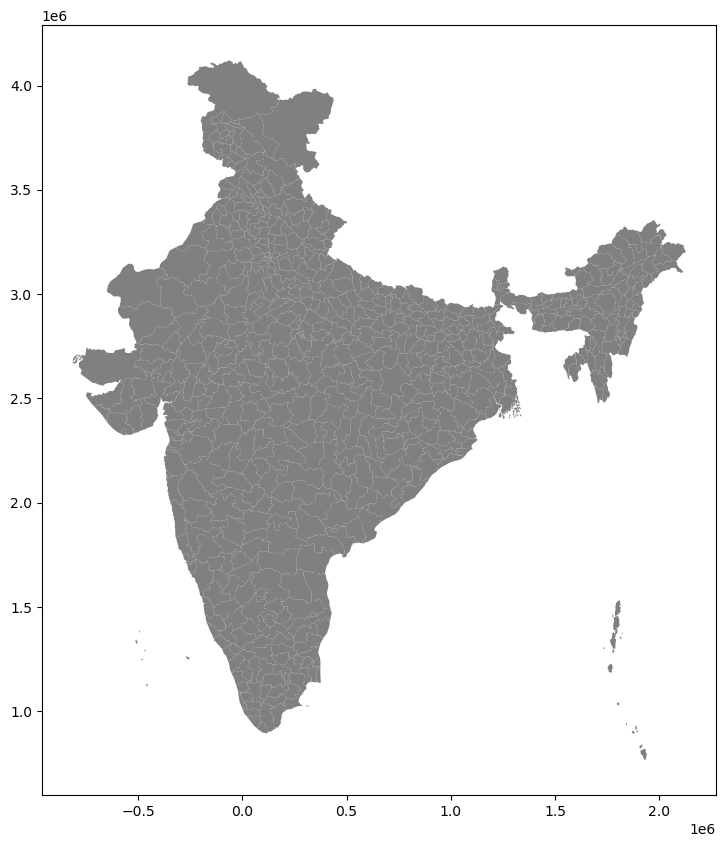

In [14]:
ax = data_df.plot(color = 'gray', figsize=(10,10), legend = True)
# data_df.plot(ax=ax, facecolor ='none', edgecolor ='blue', legend = True)

In [15]:
new_df = data_df.loc[data_df['district'] == 'Hyderabad']

In [16]:
new_df

,censuscode,district,dt_cen_cd,st_cen_cd,st_nm,geometry,Area
0,536.0,Hyderabad,5,28,Andhra Pradesh,"POLYGON ((235708.688 1931539.492, 238753.495 1...",1.681981e+08


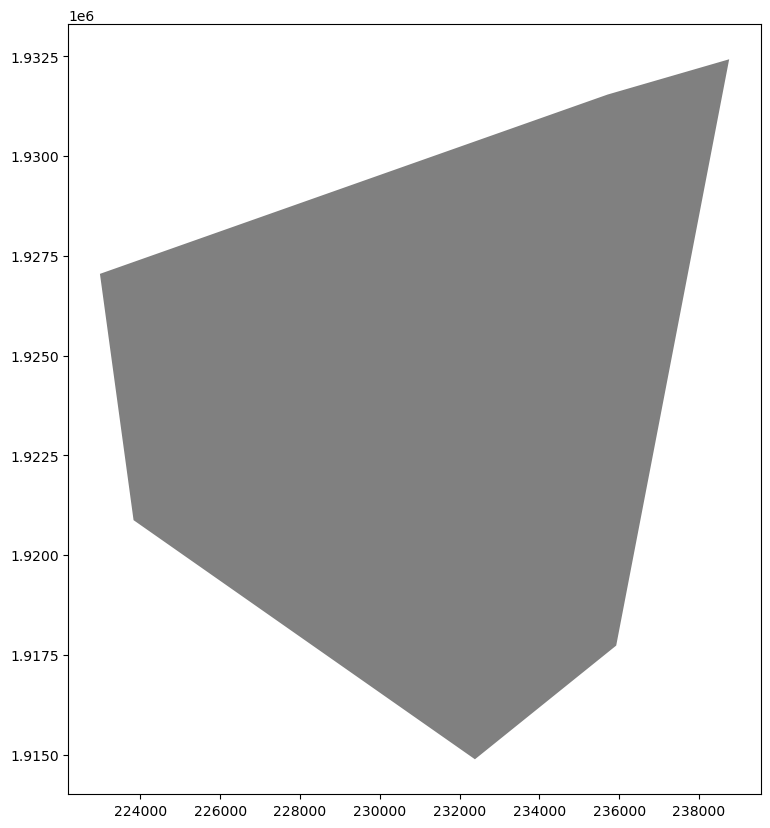

In [17]:
ax = new_df.plot(color = 'gray', figsize=(10,10), legend = True)

In [18]:
new_df.to_file("hyderabad.shp")

In [19]:
print (new_df.geometry)

0    POLYGON ((235708.688 1931539.492, 238753.495 1...
Name: geometry, dtype: geometry


In [21]:
from shapely.geometry import Point
for index, row in new_df.iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        print (Point(pt))

POINT (235708.68759398372 1931539.4919476553)
POINT (238753.4948667922 1932422.877328886)
POINT (235922.74607360805 1917732.3755261106)
POINT (232383.1127492198 1914883.463983992)
POINT (223829.57684671198 1920875.0266387141)
POINT (222987.02098785306 1927046.0597190734)
POINT (235708.68759398372 1931539.4919476553)


In [22]:
new_df = new_df.to_crs(4326)

In [23]:
from shapely.geometry import Point
for index, row in new_df.iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        print (Point(pt))

POINT (78.511639 17.454338)
POINT (78.54018 17.462671999999998)
POINT (78.515338 17.329676)
POINT (78.482408 17.303533)
POINT (78.401239 17.35661)
POINT (78.392527 17.412229999999997)
POINT (78.511639 17.454338)
